In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import csv
import re
import pandas as pd
import numpy as np

import pandas
import os

from reconchess import GameHistory
import matplotlib.pyplot as plt
from tqdm import tqdm

### Load games

In [5]:
data_path = "../game_logs/unranked_games"
reg = r"u([0-9])r([0-9])"

In [6]:
from reconchess import WinReason
from dataclasses import dataclass

BOT_NAME = "Zubat"

@dataclass
class GameData:
    opponent: str
    color: bool
    result: int
    reason: WinReason
    moves: int
    
    @classmethod
    def from_file(cls, file: str):
        return cls.from_hist(GameHistory.from_file(file))
    
    @staticmethod
    def from_hist(game_hist: GameHistory):
        return GameData(
            color=(color := game_hist.get_white_player_name() == BOT_NAME),
            result=(
                0 if game_hist.get_winner_color() is None else 
                1 if game_hist.get_winner_color() == color else 
                -1
            ),
            opponent=game_hist.get_black_player_name() if color else game_hist.get_white_player_name(),
            reason=game_hist.get_win_reason(),
            moves=game_hist.num_turns()
        )
        

In [7]:
dirs = [re.match(reg, s) for s in os.listdir(data_path)]
dirs = [dir for dir in dirs if dir is not None]
dirs

[<re.Match object; span=(0, 4), match='u0r0'>,
 <re.Match object; span=(0, 4), match='u0r1'>,
 <re.Match object; span=(0, 4), match='u0r2'>,
 <re.Match object; span=(0, 4), match='u0r3'>,
 <re.Match object; span=(0, 4), match='u0r4'>,
 <re.Match object; span=(0, 4), match='u1r0'>,
 <re.Match object; span=(0, 4), match='u1r1'>,
 <re.Match object; span=(0, 4), match='u2r0'>,
 <re.Match object; span=(0, 4), match='u2r1'>,
 <re.Match object; span=(0, 4), match='u2r2'>,
 <re.Match object; span=(0, 4), match='u2r3'>,
 <re.Match object; span=(0, 4), match='u2r4'>,
 <re.Match object; span=(0, 4), match='u3r0'>,
 <re.Match object; span=(0, 4), match='u4r0'>,
 <re.Match object; span=(0, 4), match='u4r1'>,
 <re.Match object; span=(0, 4), match='u4r2'>,
 <re.Match object; span=(0, 4), match='u4r3'>,
 <re.Match object; span=(0, 4), match='u4r4'>,
 <re.Match object; span=(0, 4), match='u6r0'>,
 <re.Match object; span=(0, 4), match='u6r1'>,
 <re.Match object; span=(0, 4), match='u6r2'>,
 <re.Match ob

In [8]:
from collections import defaultdict

games = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {})))
for dir in dirs:
    for opp in os.listdir(os.path.join(data_path, dir.string)):
        for game_id in os.listdir(os.path.join(data_path, dir.string, opp)):
            try:
                data =  GameData.from_file(os.path.join(data_path, dir.string, opp, game_id, f"game_{game_id}.log"))
                games[opp][int(dir.groups()[0])][int(dir.groups()[1])][game_id] = data
                print(data)
            except:
                print(f'{os.path.join(data_path, dir.string, opp, game_id, f"game_{game_id}.log")} NOT FOUND')

GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=74)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.TIMEOUT: 2>, moves=60)
GameData(opponent='StrangeFish2', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=97)
GameData(opponent='StrangeFish2', color=False, result=0, reason=<WinReason.MOVE_LIMIT: 5>, moves=177)
GameData(opponent='StrangeFish2', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=177)
GameData(opponent='StrangeFish2', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=71)
GameData(opponent='StrangeFish2', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=118)
GameData(opponent='StrangeFish2', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=105)
GameData(opponent='StrangeFish2', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=64)
GameData(opponent='StrangeFish2', color=False, result=-1, reason=<WinReason.KING_CAP

In [105]:
opp = "Oracle"

for u in games[opp]:
    for r in games[opp][u]:
        print(f"uncertainty: {int(u)*25:03}, risk: {int(r)*0.125:0.3f} - "
              f"games: {len(games[opp][u][r]):02}  "
              f"wins: {len([g for g in games[opp][u][r].values() if g.result == 1]):02}  "
              f"losses: {len([g for g in games[opp][u][r].values() if g.result == -1]):02}  "
              f"ties: {len([g for g in games[opp][u][r].values() if g.result == 0]):02}")

uncertainty: 000, risk: 0.000 - games: 02  wins: 02  losses: 00  ties: 00
uncertainty: 000, risk: 0.125 - games: 46  wins: 27  losses: 16  ties: 03
uncertainty: 000, risk: 0.250 - games: 32  wins: 16  losses: 16  ties: 00
uncertainty: 000, risk: 0.375 - games: 43  wins: 24  losses: 18  ties: 01
uncertainty: 000, risk: 0.500 - games: 50  wins: 29  losses: 21  ties: 00
uncertainty: 025, risk: 0.000 - games: 23  wins: 09  losses: 11  ties: 03
uncertainty: 050, risk: 0.000 - games: 26  wins: 18  losses: 08  ties: 00
uncertainty: 050, risk: 0.125 - games: 02  wins: 01  losses: 01  ties: 00
uncertainty: 050, risk: 0.250 - games: 18  wins: 13  losses: 05  ties: 00
uncertainty: 050, risk: 0.375 - games: 17  wins: 07  losses: 09  ties: 01
uncertainty: 050, risk: 0.500 - games: 05  wins: 02  losses: 02  ties: 01
uncertainty: 075, risk: 0.000 - games: 26  wins: 15  losses: 10  ties: 01
uncertainty: 100, risk: 0.000 - games: 02  wins: 02  losses: 00  ties: 00
uncertainty: 100, risk: 0.125 - games:

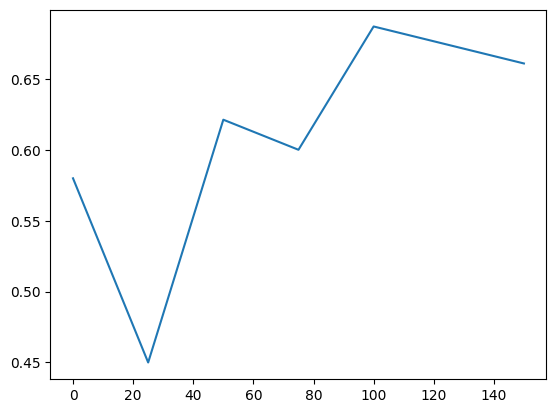

In [106]:
opp = "Oracle"

res = {}

for u in games[opp]:
    res[int(u) * 25] = (len([g for r in games[opp][u] for g in games[opp][u][r].values() if g.result==1]) / 
                        len([g for r in games[opp][u] for g in games[opp][u][r].values() if g.result!=0]))
    
plt.plot(res.keys(), res.values())

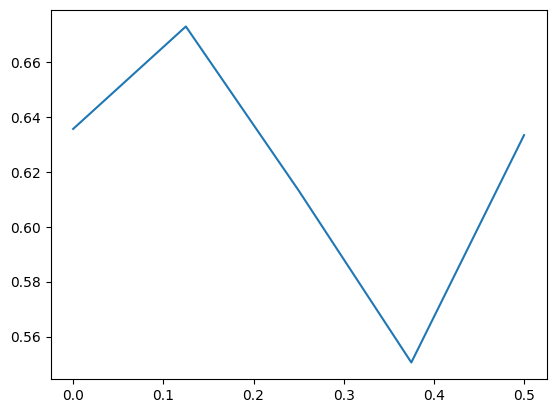

In [108]:
opp = "Oracle"

res = {}

for r in range(5):
    res[int(r) * 0.125] = (len([g for u in games[opp] for g in games[opp][u][r].values() if g.result==1]) / 
                        len([g for u in games[opp] for g in games[opp][u][r].values() if g.result!=0]))
    
plt.plot(res.keys(), res.values())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


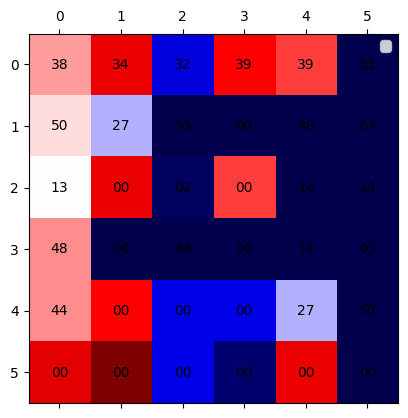

In [13]:
opp = "StrangeFish2"

fig, ax = plt.subplots()

data = [[len(games[opp][u][r]) for r in games[opp]] for u in games[opp]]

ax.matshow(data, cmap='seismic')
for (i, j), z in np.ndenumerate(data):
    ax.text(i, j, f"{z:02}", ha='center', va='center')
    
ax.legend()